# Training of Recurrenct Neural Network (RNN) model on spectrograms

In [1]:
import numpy as np
import pandas as pd

from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt

from PIL import Image
import matplotlib
import random

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import layers


tf.config.run_functions_eagerly

<function tensorflow.python.eager.polymorphic_function.polymorphic_function.run_functions_eagerly(run_eagerly)>

In [3]:
# Loading of datasets

spectr_train_list = pd.read_csv("spectr_train_list.txt", index_col = 0).iloc[:,0].values.tolist()
spectr_test_list = pd.read_csv("spectr_test_list.txt", index_col = 0).iloc[:,0].values.tolist()

# labels_train, labels_test
# spectrograms_train, spectrograms_test

labels_train = []
spectrograms_train = []

for path in spectr_train_list:
    labels_train.append(path.split("/")[1])
    
    
    rgb = matplotlib.image.imread(path)
    gray = np.mean(rgb, -1)
    spectrogram = (255*(gray - np.min(gray))/np.ptp(gray)).astype(int)  # [0, 255] scaled

    spectrograms_train.append(spectrogram)

labels_test = []
spectrograms_test = []

for path in spectr_test_list:
    labels_test.append(path.split("/")[1])
    
    rgb = matplotlib.image.imread(path)
    gray = np.mean(rgb, -1)
    spectrogram = (255*(gray - np.min(gray))/np.ptp(gray)).astype(int)  # [0, 255] scaled
    
    spectrograms_test.append(spectrogram)


In [58]:
labels_test[0:9]

['no', 'up', 'off', 'go', 'yes', 'stop', 'down', 'on', 'down']

In [4]:
# preparing datasets for models

dummies = pd.get_dummies(labels_train)
y_train = tf.one_hot(dummies,10)

dataset_train = tf.data.Dataset.from_tensor_slices((spectrograms_train, dummies)).shuffle(200).batch(8)

####################

dummies2 = pd.get_dummies(labels_test)
y_test = tf.one_hot(dummies2, 10)

dataset_test = tf.data.Dataset.from_tensor_slices((spectrograms_test, dummies2)).batch(8)

#####################

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                           mode='max',
                           verbose=1,
                           patience=4)


# Model architecture

In [62]:
# model - LSTM
def get_model_RNN():
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.LSTM(units = 64, return_sequences = True, input_shape=[64,64]))
  model.add(tf.keras.layers.LSTM(units = 64, return_sequences = True))

  model.add(tf.keras.layers.Dense(units = 32))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(units = 10, activation='softmax'))

  model.compile(loss = 'categorical_crossentropy',
             optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
             metrics = ['accuracy'])
  return model

# Model training & ealuation

In [63]:
# model 1

model_RNN = get_model_RNN()

model_RNN.fit(dataset_train, epochs=50,  callbacks =[early_stop], validation_data=dataset_test)

Epoch 1/50
483/483 [==============================] - 32s 55ms/step - loss: 2.2395 - accuracy: 0.1606 - val_loss: 2.1018 - val_accuracy: 0.2665
Epoch 2/50
483/483 [==============================] - 25s 52ms/step - loss: 1.9484 - accuracy: 0.3098 - val_loss: 1.7458 - val_accuracy: 0.4033
Epoch 3/50
483/483 [==============================] - 25s 51ms/step - loss: 1.6072 - accuracy: 0.4389 - val_loss: 1.4957 - val_accuracy: 0.4822
Epoch 4/50
483/483 [==============================] - 24s 50ms/step - loss: 1.3887 - accuracy: 0.5109 - val_loss: 1.3376 - val_accuracy: 0.5482
Epoch 5/50
483/483 [==============================] - 24s 50ms/step - loss: 1.2319 - accuracy: 0.5736 - val_loss: 1.2266 - val_accuracy: 0.5769
Epoch 6/50
483/483 [==============================] - 25s 51ms/step - loss: 1.1074 - accuracy: 0.6197 - val_loss: 1.1362 - val_accuracy: 0.6148
Epoch 7/50
483/483 [==============================] - 25s 51ms/step - loss: 0.9966 - accuracy: 0.6554 - val_loss: 1.0613 - val_accuracy:

# Model 2 - more robust

In [64]:
# model - LSTM
def get_model_RNN2():
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.LSTM(units = 128, return_sequences = True, input_shape=[64,64]))
  model.add(tf.keras.layers.LSTM(units = 128, return_sequences = True))

  model.add(tf.keras.layers.Dense(units = 64))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(units = 10, activation='softmax'))

  model.compile(loss = 'categorical_crossentropy',
             optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
             metrics = ['accuracy'])
  return model

In [65]:
# model 2

model_RNN2 = get_model_RNN2()

model_RNN2.fit(dataset_train, epochs=50,  callbacks =[early_stop], validation_data=dataset_test)

Epoch 1/50
483/483 [==============================] - 49s 91ms/step - loss: 2.1186 - accuracy: 0.2306 - val_loss: 1.7894 - val_accuracy: 0.3892
Epoch 2/50
483/483 [==============================] - 43s 90ms/step - loss: 1.6071 - accuracy: 0.4293 - val_loss: 1.4027 - val_accuracy: 0.5237
Epoch 3/50
483/483 [==============================] - 45s 92ms/step - loss: 1.2763 - accuracy: 0.5459 - val_loss: 1.1683 - val_accuracy: 0.5891
Epoch 4/50
483/483 [==============================] - 45s 93ms/step - loss: 1.0340 - accuracy: 0.6324 - val_loss: 1.0353 - val_accuracy: 0.6452
Epoch 5/50
483/483 [==============================] - 44s 91ms/step - loss: 0.8422 - accuracy: 0.7000 - val_loss: 0.9232 - val_accuracy: 0.6739
Epoch 6/50
483/483 [==============================] - 45s 93ms/step - loss: 0.6917 - accuracy: 0.7518 - val_loss: 0.8720 - val_accuracy: 0.7089
Epoch 7/50
483/483 [==============================] - 44s 90ms/step - loss: 0.5552 - accuracy: 0.8070 - val_loss: 0.8621 - val_accuracy:

In [67]:
model_RNN2.fit(dataset_train, epochs=20,  callbacks =[early_stop], validation_data=dataset_test)

Epoch 1/20
483/483 [==============================] - 44s 91ms/step - loss: 0.1433 - accuracy: 0.9617 - val_loss: 0.9758 - val_accuracy: 0.7797
Epoch 2/20
483/483 [==============================] - 44s 90ms/step - loss: 0.0965 - accuracy: 0.9744 - val_loss: 1.1706 - val_accuracy: 0.7621
Epoch 3/20
483/483 [==============================] - 45s 93ms/step - loss: 0.0722 - accuracy: 0.9821 - val_loss: 1.1034 - val_accuracy: 0.7855
Epoch 4/20
483/483 [==============================] - 43s 89ms/step - loss: 0.0773 - accuracy: 0.9790 - val_loss: 1.0642 - val_accuracy: 0.7914
Epoch 5/20
483/483 [==============================] - 43s 89ms/step - loss: 0.0562 - accuracy: 0.9876 - val_loss: 1.1104 - val_accuracy: 0.7943
Epoch 6/20
483/483 [==============================] - 44s 90ms/step - loss: 0.0474 - accuracy: 0.9896 - val_loss: 1.1606 - val_accuracy: 0.7995
Epoch 6: early stopping


# Saving the model

In [68]:
model_RNN2.save('./model2.h5',save_format='h5')


In [69]:
model_RNN.save('./model.h5',save_format='h5')

In [70]:
model = tf.keras.models.load_model('./model2.h5')

# Conclusions - project prototype

The first model obtained **74\% accuracy** on validation data set, whereas the second model obtained almost **80\% accuracy** with the same setting. 

Reminder: it was a 10 class classification problem with balanced classes.

Possible ideas to train better version of the final model:

- decreasing learning rate, as models started to overfit ( extended learning process)
- use more layers and units within each layer ( more robust models)
- prepare other version of spectrograms (better data means better model)

# Another model architectures

#### Higher learning rate 

In [6]:
# model 3 - LSTM
def get_model_RNN3():
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.LSTM(units = 128, return_sequences = True, input_shape=[64,64]))
  model.add(tf.keras.layers.LSTM(units = 128, return_sequences = True))

  model.add(tf.keras.layers.Dense(units = 64))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(units = 10, activation='softmax'))

  model.compile(loss = 'categorical_crossentropy',
             optimizer = keras.optimizers.Adam(learning_rate = 0.001),
             metrics = ['accuracy'])
  return model

In [7]:
# model 3 training

model_RNN3 = get_model_RNN3()

model_RNN3.fit(dataset_train, epochs=50,  callbacks =[early_stop], validation_data=dataset_test)

Epoch 1/50
483/483 [==============================] - 50s 91ms/step - loss: 1.6878 - accuracy: 0.3907 - val_loss: 1.1061 - val_accuracy: 0.6125
Epoch 2/50
483/483 [==============================] - 42s 87ms/step - loss: 1.0419 - accuracy: 0.6264 - val_loss: 0.8465 - val_accuracy: 0.6973
Epoch 3/50
483/483 [==============================] - 42s 88ms/step - loss: 0.8311 - accuracy: 0.6902 - val_loss: 0.7481 - val_accuracy: 0.7417
Epoch 4/50
483/483 [==============================] - 42s 87ms/step - loss: 0.6734 - accuracy: 0.7601 - val_loss: 0.7180 - val_accuracy: 0.7580
Epoch 5/50
483/483 [==============================] - 42s 87ms/step - loss: 0.5627 - accuracy: 0.7940 - val_loss: 0.7578 - val_accuracy: 0.7510
Epoch 6/50
483/483 [==============================] - 43s 88ms/step - loss: 0.4621 - accuracy: 0.8290 - val_loss: 0.6925 - val_accuracy: 0.7762
Epoch 7/50
483/483 [==============================] - 43s 88ms/step - loss: 0.3836 - accuracy: 0.8596 - val_loss: 0.6924 - val_accuracy:

Accuracy: 83\%

In [8]:
# model 4 - LSTM with dropout
def get_model_RNN4():
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.LSTM(units = 128, return_sequences = True, input_shape=[64,64]))
  model.add(tf.keras.layers.LSTM(units = 128, return_sequences = True))

  model.add(tf.keras.layers.Dense(units = 64))
    
  model.add(tf.keras.layers.Dropout(.2))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(units = 10, activation='softmax'))

  model.compile(loss = 'categorical_crossentropy',
             optimizer = keras.optimizers.Adam(learning_rate = 0.001),
             metrics = ['accuracy'])
  return model

In [9]:
# model 4 training

model_RNN4 = get_model_RNN4()

model_RNN4.fit(dataset_train, epochs=50,  callbacks =[early_stop], validation_data=dataset_test)

Epoch 1/50
483/483 [==============================] - 48s 88ms/step - loss: 1.6854 - accuracy: 0.3974 - val_loss: 1.1671 - val_accuracy: 0.5956
Epoch 2/50
483/483 [==============================] - 43s 90ms/step - loss: 1.0593 - accuracy: 0.6212 - val_loss: 0.9061 - val_accuracy: 0.6943
Epoch 3/50
483/483 [==============================] - 43s 89ms/step - loss: 0.8099 - accuracy: 0.7142 - val_loss: 0.7865 - val_accuracy: 0.7306
Epoch 4/50
483/483 [==============================] - 41s 85ms/step - loss: 0.6774 - accuracy: 0.7541 - val_loss: 0.8005 - val_accuracy: 0.7241
Epoch 5/50
483/483 [==============================] - 43s 88ms/step - loss: 0.5532 - accuracy: 0.7982 - val_loss: 0.7021 - val_accuracy: 0.7674
Epoch 6/50
483/483 [==============================] - 43s 88ms/step - loss: 0.4773 - accuracy: 0.8259 - val_loss: 0.7165 - val_accuracy: 0.7721
Epoch 7/50
483/483 [==============================] - 43s 89ms/step - loss: 0.3922 - accuracy: 0.8552 - val_loss: 0.7129 - val_accuracy:

Accuracy: 82.5\% -- the dropout layer did not improve the validation accuracy.

In [10]:
# model 5 - LSTM - 3 lstm layers with more units, 2 dense layers
def get_model_RNN5():
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.LSTM(units = 256, return_sequences = True, input_shape=[64,64]))
  model.add(tf.keras.layers.LSTM(units = 256, return_sequences = True))
  model.add(tf.keras.layers.LSTM(units = 256, return_sequences = True))

  model.add(tf.keras.layers.Dense(units = 128))
  model.add(tf.keras.layers.Dense(units = 64))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(units = 10, activation='softmax'))

  model.compile(loss = 'categorical_crossentropy',
             optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
             metrics = ['accuracy'])
  return model

In [11]:
# model 5 training

model_RNN5 = get_model_RNN5()

model_RNN5.fit(dataset_train, epochs=50,  callbacks =[early_stop], validation_data=dataset_test)

Epoch 1/50
483/483 [==============================] - 143s 281ms/step - loss: 1.9739 - accuracy: 0.2775 - val_loss: 1.5156 - val_accuracy: 0.4582
Epoch 2/50
483/483 [==============================] - 136s 282ms/step - loss: 1.3561 - accuracy: 0.5096 - val_loss: 1.1753 - val_accuracy: 0.5716
Epoch 3/50
483/483 [==============================] - 133s 276ms/step - loss: 1.0028 - accuracy: 0.6303 - val_loss: 0.9488 - val_accuracy: 0.6622
Epoch 4/50
483/483 [==============================] - 134s 277ms/step - loss: 0.7637 - accuracy: 0.7223 - val_loss: 0.8346 - val_accuracy: 0.7189
Epoch 5/50
483/483 [==============================] - 133s 275ms/step - loss: 0.5522 - accuracy: 0.7979 - val_loss: 0.8455 - val_accuracy: 0.7271
Epoch 6/50
483/483 [==============================] - 132s 274ms/step - loss: 0.3916 - accuracy: 0.8567 - val_loss: 0.9784 - val_accuracy: 0.7195
Epoch 7/50
483/483 [==============================] - 133s 276ms/step - loss: 0.2823 - accuracy: 0.9028 - val_loss: 0.9043 -

In [5]:
# model 6 - LSTM - 1 lstm layer with more units, 1 huge dense layers, higher learning rate
def get_model_RNN6():
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.LSTM(units = 512, return_sequences = True, input_shape=[64,64]))

  model.add(tf.keras.layers.Dense(units = 256))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(units = 10, activation='softmax'))

  model.compile(loss = 'categorical_crossentropy',
             optimizer = keras.optimizers.Adam(learning_rate = 0.001),
             metrics = ['accuracy'])
  return model

In [6]:
# model 6 training

model_RNN6 = get_model_RNN6()

model_RNN6.fit(dataset_train, epochs=50,  callbacks =[early_stop], validation_data=dataset_test)

Epoch 1/50
483/483 [==============================] - 69s 138ms/step - loss: 1.6664 - accuracy: 0.4425 - val_loss: 1.1316 - val_accuracy: 0.6143
Epoch 2/50
483/483 [==============================] - 67s 139ms/step - loss: 0.9895 - accuracy: 0.6674 - val_loss: 0.9355 - val_accuracy: 0.6826
Epoch 3/50
483/483 [==============================] - 67s 139ms/step - loss: 0.7390 - accuracy: 0.7477 - val_loss: 0.9581 - val_accuracy: 0.6943
Epoch 4/50
483/483 [==============================] - 67s 139ms/step - loss: 0.5775 - accuracy: 0.7964 - val_loss: 0.9212 - val_accuracy: 0.7399
Epoch 5/50
483/483 [==============================] - 66s 136ms/step - loss: 0.4590 - accuracy: 0.8484 - val_loss: 0.9284 - val_accuracy: 0.7528
Epoch 6/50
483/483 [==============================] - 65s 135ms/step - loss: 0.3915 - accuracy: 0.8648 - val_loss: 1.0402 - val_accuracy: 0.7481
Epoch 7/50
483/483 [==============================] - 67s 139ms/step - loss: 0.4136 - accuracy: 0.8712 - val_loss: 1.3223 - val_ac

There was an increasing validation loss. This model had a poor performance.

# Training and saving the best model - 3rd model

In [17]:
# model 3 - LSTM
def get_model_RNN3():
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.LSTM(units = 128, return_sequences = True, input_shape=[64,64]))
  model.add(tf.keras.layers.LSTM(units = 128, return_sequences = True))

  model.add(tf.keras.layers.Dense(units = 64))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(units = 10, activation='softmax'))

  model.compile(loss = 'categorical_crossentropy',
             optimizer = keras.optimizers.Adam(learning_rate = 0.0005),
             metrics = ['accuracy'])
  return model

In [19]:
# model 3 training

model_RNN3 = get_model_RNN3()

model_RNN3.fit(dataset_train, epochs=18,  callbacks =[early_stop], validation_data=dataset_test)

Epoch 1/18
483/483 [==============================] - 30s 57ms/step - loss: 1.7914 - accuracy: 0.3433 - val_loss: 1.3013 - val_accuracy: 0.5371
Epoch 2/18
483/483 [==============================] - 26s 54ms/step - loss: 1.1062 - accuracy: 0.5946 - val_loss: 0.8550 - val_accuracy: 0.6973
Epoch 3/18
483/483 [==============================] - 26s 55ms/step - loss: 0.7912 - accuracy: 0.7168 - val_loss: 0.7299 - val_accuracy: 0.7469
Epoch 4/18
483/483 [==============================] - 26s 55ms/step - loss: 0.5880 - accuracy: 0.7858 - val_loss: 0.6931 - val_accuracy: 0.7598
Epoch 5/18
483/483 [==============================] - 27s 55ms/step - loss: 0.4506 - accuracy: 0.8399 - val_loss: 0.7096 - val_accuracy: 0.7726
Epoch 6/18
483/483 [==============================] - 26s 55ms/step - loss: 0.3327 - accuracy: 0.8847 - val_loss: 0.6932 - val_accuracy: 0.7890
Epoch 7/18
483/483 [==============================] - 27s 56ms/step - loss: 0.2750 - accuracy: 0.8990 - val_loss: 0.7407 - val_accuracy:

KeyboardInterrupt: 

In [20]:
model_RNN3.save('./model3.h5',save_format='h5')
model = tf.keras.models.load_model('./model3.h5')

# Evaluation of the best model - confusion matrix

In [22]:
aux = model.predict(dataset_test)

214/214 [==============================] - 3s 15ms/step


In [37]:
aux = np.argmax(aux, axis = 1)

In [65]:
NumbersToWordsMap = {9: "yes", 3:"no",8:"up",0:"down",2:"left",6:"right",
                     5:"on",4:"off",7:"stop",1:"go"}

In [66]:
predicted_labels = np.vectorize(NumbersToWordsMap.get)(aux)

predicted_labels

array(['go', 'up', 'off', ..., 'right', 'stop', 'on'], dtype='<U5')

In [67]:
true_labels = np.array(labels_test)
true_labels

array(['no', 'up', 'off', ..., 'right', 'stop', 'on'], dtype='<U5')

In [64]:
y_test[440,0,0]

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [49]:
from sklearn.metrics import confusion_matrix

In [68]:
cf_matrix = confusion_matrix(true_labels, predicted_labels)
print(cf_matrix)

[[138   9   3  14   0   1   0   2   0   2]
 [  6 125   1  16   2   1   3   6   5   2]
 [  4   0 147   6   2   1   4   3   4   7]
 [  4  17   1 141   1   1   1   0   1   1]
 [  1   2   1   1 143  13   0   4  10   0]
 [  4   1   2   1   8 144   2   0   2   0]
 [  2   5   3   2   0   3 153   0   4   0]
 [  2   1   3   4   6   1   1 138   7   3]
 [  2   4   3   3   5   0   1  14 150   0]
 [  4   2   8   3   0   0   2   1   2 148]]


[Text(0.5, 1.0, 'Confusion matrix with frequency predictions - validation data'),
 Text(50.722222222222214, 0.5, 'Predicted value of label'),
 Text(0.5, 23.52222222222222, 'True value of label')]

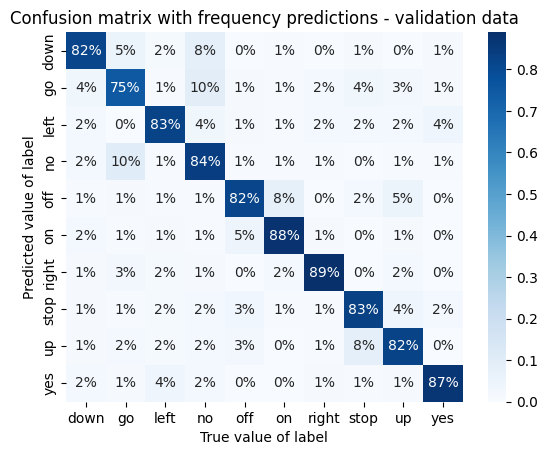

In [79]:
import seaborn as sns

#ticklabels = ["yes","no","up","down","left","right","on","off","stop","go"]

#sth = {9: "yes", 3:"no",8:"up",0:"down",2:"left",6:"right",
                     5:"on",4:"off",7:"stop",1:"go"}

ticklabels = ["down", "go", "left", "no", "off", "on", "right", "stop", "up", "yes"]

sns.heatmap(cf_matrix/np.sum(cf_matrix, axis = 1), annot=True, 
            fmt='.0%', cmap='Blues',
           xticklabels=ticklabels, yticklabels=ticklabels).set(title = "Confusion matrix with frequency predictions - validation data", ylabel = "Predicted value of label", xlabel = "True value of label")

# Conclusions - confusion matrix

The most mistaken labels ( one with another) were **go** and **no** - it is understandable, because even a human can sometimes mishear these words and thus confuse them.

The model predicted **right**, **on** and **yes** labels with the highest success - reaching almost 90\%.